<a href="https://colab.research.google.com/github/ekansh1811/neural/blob/try-1/Copy_of_IEEE_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IEEE FINAL ROUND**

(Explanation in the end)

some changes

---



In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
data_train = datasets.MNIST(
    root = "Data",
    train = True,
    download = True,
    transform = ToTensor(),
)


data_test = datasets.MNIST(
    root = "Data",
    train = False,
    download = False,
    transform = ToTensor(),
)

This is used to pre-load the MNIST dataset into 2 different datasets which are used to train and test the model

In [ ]:
batch_size = 256
train_data = DataLoader(data_train, batch_size = batch_size)
test_data = DataLoader(data_test, batch_size = batch_size)

This loads the data into the respective datasets

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


This is required to use the gpu which is required for data processing

In [ ]:
input_size = 784
hidden_size = 32
hidden_size_2 = 32
num_classes = 10
class NeuralNetwork(nn.Module):
      def __init__(self, input_size, hidden_size, hidden_size_2, num_classes):
              super(NeuralNetwork, self).__init__()
              self.input_size = input_size
              self.l1 = nn.Linear(input_size, hidden_size) 
              self.relu = nn.ReLU()
              self.l2 = nn.Linear(hidden_size, hidden_size_2)
              self.relu = nn.ReLU()
              self.l3 = nn.Linear(hidden_size_2,num_classes)
      def forward(self, x):
         out = self.l1(x)
         out = self.relu(out)
         out = self.l2(out)
         out = self.relu(out)
         out = self.l3(out)
         return out

This defines the main model using classes.

In [ ]:
model = NeuralNetwork(input_size, hidden_size, hidden_size_2, num_classes).to(device)

This creates the model by calling the function

In [ ]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

This the loss function and the optimizer, I tried using different values for learning rate and momentum but found this as the most suitable parameters.

86.97
runs [1], Loss: 0.4988



90.44
runs [2], Loss: 0.3758



91.68
runs [3], Loss: 0.3403



92.55
runs [4], Loss: 0.3231



93.28
runs [5], Loss: 0.3076



93.7
runs [6], Loss: 0.2913



94.15
runs [7], Loss: 0.2791



94.44
runs [8], Loss: 0.2680



94.71
runs [9], Loss: 0.2560



94.94
runs [10], Loss: 0.2466



95.11
runs [11], Loss: 0.2397



95.2
runs [12], Loss: 0.2321



95.32
runs [13], Loss: 0.2224



95.47
runs [14], Loss: 0.2161



95.57
runs [15], Loss: 0.2102



95.68
runs [16], Loss: 0.2034



95.76
runs [17], Loss: 0.1985



95.88
runs [18], Loss: 0.1961



95.92
runs [19], Loss: 0.1916



96.0
runs [20], Loss: 0.1884



96.07
runs [21], Loss: 0.1854



96.09
runs [22], Loss: 0.1834



96.15
runs [23], Loss: 0.1809



96.18
runs [24], Loss: 0.1787



96.24
runs [25], Loss: 0.1761



96.24
runs [26], Loss: 0.1733



96.27
runs [27], Loss: 0.1704



96.27
runs [28], Loss: 0.1674



96.36
runs [29], Loss: 0.1665



96.37
runs [30], Loss: 0.1644



96.42
runs [31], Loss:

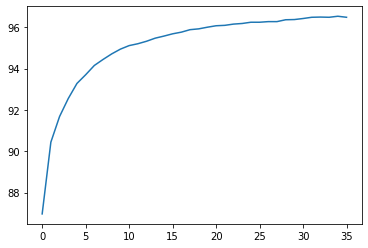

In [ ]:
num_runs = 20
run_loss = []
run_1 = [0,0]
runs = 0
for k in range(2):
  ctr = 0
  ctr_2 = 0
  while True:


      for i, (images, labels) in enumerate(train_data):  
          images = images.reshape(-1, 28*28).to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss = criterion(outputs, labels)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          run_loss.append(loss.item())



      with torch.no_grad():
            n_correct = 0
            n_samples = 0
            n_samples_l = []
            n_correct_l = []
            for images, labels in test_data:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                n_samples += labels.size(0)
                n_correct += (predicted == labels).sum().item()
                n_correct_l+= [100*n_correct/n_samples]
                n_samples_l += [n_samples]
      acc = 100.0 * n_correct / n_samples
      print(acc)





      if (i+1) % 235 == 0:
                    print (f'runs [{runs+1}], Loss: {loss.item():.4f}')
                    run_1+=[acc]
                    ctr+=1
                    runs+=1
                    if ctr>0:
                      print('\n\n')
                      if run_1[len(run_1)-1]>95 and ((((run_1[len(run_1)-3])==(run_1[len(run_1)-2])) and ((run_1[len(run_1)-2])==(run_1[len(run_1)-1]))) or (run_1[len(run_1)-1]<run_1[len(run_1)-2])):
                        ctr_2+=1
                        break
      if ctr_2>0:
        break
plt.plot(run_1[2:]);

This trains the model and prints which iteration is going on. It also gives the loss and accuracy in percentage, which is used to plot a graph which displays the accuracy with every iteration done in the loop.

It trains the model till accuracy becomes constant for more than 2 values or it starts decreasing.

The model a few times while training gives lower accuracy in one iteration but increases in the next, to prevent this unexpected event i ran the loop twice which would run the same conditions giving it a better chance to reach a higher value.

I had given an initial values of 0 in the list which stores the data to prevent index error in the termintation function at the first couple of values.

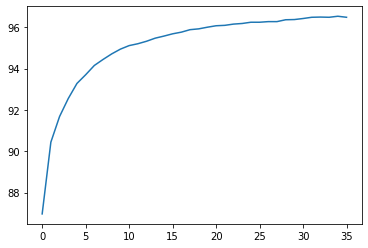

In [ ]:
plt.plot(run_1[2:]);

96.48


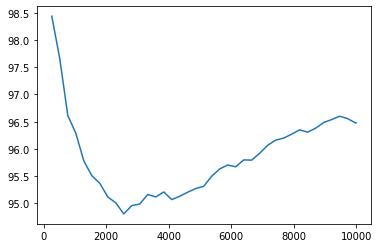

In [ ]:
with torch.no_grad():
     n_correct = 0
     n_samples = 0
     n_samples_l = []
     n_correct_l = []
     for images, labels in test_data:
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         _, predicted = torch.max(outputs.data, 1)
         n_samples += labels.size(0)
         n_correct += (predicted == labels).sum().item()
         n_correct_l+= [100*n_correct/n_samples]
         n_samples_l += [n_samples]
acc = 100.0 * n_correct / n_samples
plt.plot(n_samples_l,n_correct_l)
print(acc)


This function is used to test the model with the 10000 test images given in the MNIST dataset.

The Final accuracy is also displayed.

This gives the graph of the change in accuracy with each test from the dataset.

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


This saves the Model in its current trained state.

In [ ]:
model = NeuralNetwork(input_size, hidden_size, hidden_size_2, num_classes).to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

This is used to call and load the trained model.

In [ ]:

with torch.no_grad():
     n_correct = 0
     n_samples = 0
     n_samples_l = []
     n_correct_l = []
     c = 0
     for images, labels in test_data:
         image = images
         images = images.reshape(-1, 28*28).to(device)
         labels = labels.to(device)
         outputs = model(images)
         # max returns (value ,index)
         _, predicted = torch.max(outputs.data, 1)
         for i in range(5):
          a = predicted[i]
          b = labels[i]
          if a!=b:
            c+=1
          print("prediction:",a.item(),"Actual:",b.item())
         



prediction: 7 Actual: 7
prediction: 2 Actual: 2
prediction: 1 Actual: 1
prediction: 0 Actual: 0
prediction: 4 Actual: 4
prediction: 2 Actual: 2
prediction: 8 Actual: 8
prediction: 2 Actual: 2
prediction: 0 Actual: 6
prediction: 8 Actual: 8
prediction: 2 Actual: 2
prediction: 2 Actual: 2
prediction: 6 Actual: 6
prediction: 3 Actual: 3
prediction: 2 Actual: 2
prediction: 1 Actual: 1
prediction: 6 Actual: 6
prediction: 4 Actual: 4
prediction: 7 Actual: 7
prediction: 1 Actual: 1
prediction: 8 Actual: 4
prediction: 1 Actual: 1
prediction: 8 Actual: 8
prediction: 1 Actual: 1
prediction: 3 Actual: 3
prediction: 1 Actual: 1
prediction: 5 Actual: 5
prediction: 9 Actual: 9
prediction: 2 Actual: 7
prediction: 3 Actual: 3
prediction: 6 Actual: 6
prediction: 6 Actual: 6
prediction: 2 Actual: 2
prediction: 3 Actual: 3
prediction: 7 Actual: 7
prediction: 7 Actual: 7
prediction: 9 Actual: 9
prediction: 0 Actual: 0
prediction: 2 Actual: 2
prediction: 0 Actual: 0
prediction: 7 Actual: 7
prediction: 9 Ac

This is the test on some sets of data from the test dataset which shows which predictions are correct and which are not value by value.

In [ ]:
print(c)

7


This is the number of errors in the above test.



In [ ]:
error = c/200*100
print(error,'%',sep='')

3.5000000000000004%


This is the error percentage in the above run as there are 40 values in 1 set and which gives 200 in 5 sets.



---


---



# **NEURAL NETWORK IEEE FINAL ROUND**

I took a few different approaches while creating the model and arrived at the result.

I built the the system which takes an input of 784 units as it is the number of pixels in one MNIST picture as it has 28x28 pixels.

After this I created 2 hidden layers of 32 neurons each which in the end gives a result by selecting 1 out of the final 10 options in the output layer.

2 layers had a much better output with respect to 1 as it increased the accuracy by helping compare more aspects of the data.

I tried using different optimizers and decided to go with the SGD momentum instead of adam.

I am using cross entropy loss function. This function penalizes the high confidence wrong values but also low confidence correct values. Which would give the model a better chance to predict data with higher confidence and thus increasing accuracy.

For overfitting and underfitting I created a loop which first trains the data and tests it after each run and calculates the accuracy. When the accuracy remains constant for more than 2 iterations or the accuracy reduces it breaks the loop and we get the final model.

Sometimes the accuracy decreases for 1 iteration but increases in the iteration just after so I decided to run the loop twice to minimise this unexpected error.

I tried minimising the loss but it did directly corelate with the accuracy as on few occasions the accuracy decreased with decrease in loss.

In the end I saved and called the model and ran a few sets of testing data and got most of the predictions right.